               Calories  Total Fat  Cholesterol    Sodium  Carbohydrates  \
Calories       1.000000   0.904409     0.596399  0.712309       0.781539   
Total Fat      0.904409   1.000000     0.680547  0.846158       0.461213   
Cholesterol    0.596399   0.680547     1.000000  0.624362       0.270977   
Sodium         0.712309   0.846158     0.624362  1.000000       0.200796   
Carbohydrates  0.781539   0.461213     0.270977  0.200796       1.000000   
Dietary Fiber  0.538894   0.580837     0.435575  0.694389       0.224577   
Sugars         0.259598  -0.115446    -0.135518 -0.426536       0.762362   
Protein        0.787847   0.807773     0.561561  0.869802       0.352122   

               Dietary Fiber    Sugars   Protein  
Calories            0.538894  0.259598  0.787847  
Total Fat           0.580837 -0.115446  0.807773  
Cholesterol         0.435575 -0.135518  0.561561  
Sodium              0.694389 -0.426536  0.869802  
Carbohydrates       0.224577  0.762362  0.352122  
Dietary F

0.9994716750523599

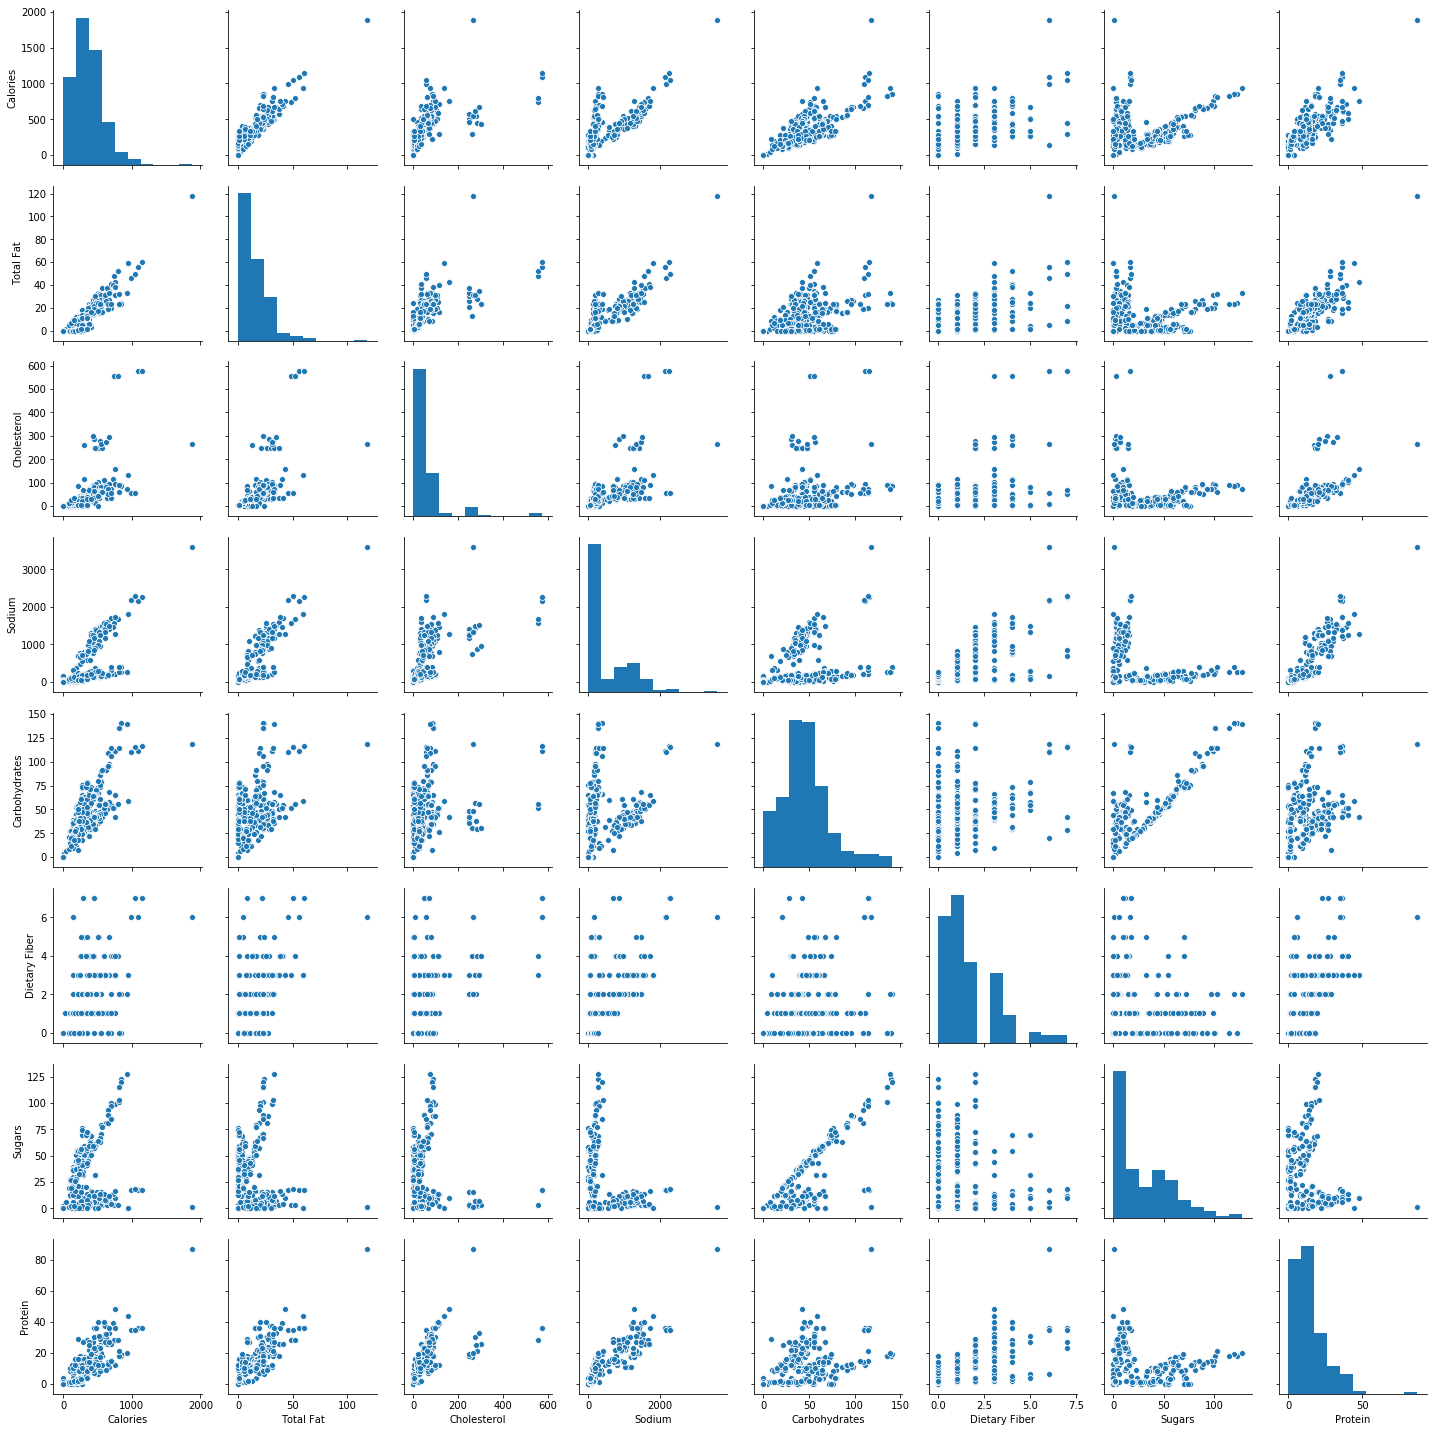

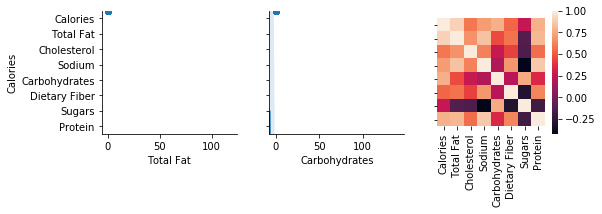

In [2]:

# coding: utf-8

# # McDonald's Menu Dataset 
# The data consists of nutrients value of all the items that are served @McDonald's Outlets. 
# The dataset is taken from kaggle.

# # Load data

# In[1]:


import numpy as np
import pandas as pd
data = pd.read_csv("/Users/siva/GitHub/Python-AI/menu.csv")
data.head()


# In[2]:


data.shape


# There are 260 rows and 24 columns
# # Check for missing values

# In[3]:


data.isnull().sum()


# There are no missing values
# # Describe data

# In[4]:


data.describe()


# Some variables with daily values and item size, category, etc are not necessary for us. lets drop them.

# In[5]:


dataset = data.loc[:,['Calories','Total Fat','Cholesterol','Sodium','Carbohydrates','Dietary Fiber','Sugars','Protein']]
dataset.head()


# # Visualization
# Scatter plot

# In[6]:


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
plt.show(block=True)

sns.pairplot(dataset)


# In[43]:


sns.pairplot(dataset, x_vars=['Total Fat','Carbohydrates','Protein'],y_vars='Calories', kind = 'reg')


# From scatter plots we can see linear relationships between calories and other variable
# Lets see corrplots

# In[7]:


cor = dataset.corr()
print(cor)


# In[50]:


sns.heatmap(cor,square=True)


# From corrplot we can see total fat,carbohydrates and protein has high positive correlation

# # Split data into train and test

# In[13]:


import sklearn
from sklearn.model_selection import train_test_split
X = dataset.loc[:,['Total Fat', 'Carbohydrates','Protein']]
y = dataset.loc[:,'Calories']
y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# In[14]:


X_train.shape , X_test.shape, y_train.shape, y_test.shape


# # Linear Regression Model

# In[15]:


##Sklearn
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)


# Intercept and Coefficients

# In[16]:


# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)


# # Predictions

# In[17]:


# make predictions on the testing set
y_pred = linreg.predict(X_test)


# In[18]:


from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# # Accuracy
# R^2 Value

# In[20]:


linreg.score(X,y)


# ~100% accuracy.! 
# R^2 of 0.999(1) means that the independent variables(Total.Fat, Protein, Carbohydrates) are able to explain almost 100% of variance in Calories.
# 

